# Inferential statistics
## Part II - Exploratory Data Analysis

Before starting the actual analysis it's a good idea to explore the data that we will be using, to give yourself a first idea of the questions you will be able to answer with your data, the bias you could have, other data you could need, etc.

### Libraries
In addition to pandas we will also import matplolib and seaborn so that we will able to plot our data to better understand it.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)

### Explore the dataset

Let's load the cleaned dataset first. Import it with the name `wnba` and show the head.

In [3]:
#imported "my cleaned dataset" from previous lab

wnba = pd.read_csv("/content/1_Data_Cleaning_wnba_cleaned.csv")
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195,38.5,21,68,30.9,17,21,81.0,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0


**Use describe() to take an initial look at the data.**

In [ ]:
wnba.describe()

Most of the game-related stats have a very high range of values which can be explained by the fact that the dataset contains data on both players that play the majority of games and also players that may spend almost the entirety of the season on the bench.

There are also some extremes in the weight and age columns. Feel free, if you'd like, to check which are the players with a very high (or low) age/weight and do some research on them. This is useful to confirm that they are simply outliers and not errors in the data.

In [ ]:
max_weight = wnba["Weight"].max()
max_weight_players = wnba.loc[wnba["Weight"] == max_weight]
max_weight_players


In [ ]:
min_weight = wnba["Weight"].min()
min_weight_players = wnba.loc[wnba["Weight"] == min_weight]
min_weight_players

# Analysis: Here, maybe some years ago the weight was the same, but actually today they have 30 kg apart, so there must be a typo on Amanda, which is 83kg today

In [ ]:
max_height = wnba["Height"].max()
max_height_players = wnba.loc[wnba["Height"] == max_height]
max_height_players

# Right

In [ ]:
min_height = wnba["Height"].min()
min_height_players = wnba.loc[wnba["Height"] == min_height]
min_height_players

# Right

In [ ]:
min_age = wnba["Age"].min()
min_age_players = wnba.loc[wnba["Age"] == min_age]
min_age_players


In [ ]:
max_age = wnba["Age"].max()
max_age_players = wnba.loc[wnba["Age"] == max_age]
max_age_players

# Analysis: There must be a typo here because Angel Robinson was born in 1987 and Brionna Jones in 1995, so age cannot be the same.

### Looking at the distributions of the data
Let's take a look at the distribution of the 4 stats that describe the physical characteristics of the players.

**Plot the four distributions about `height`, `weight`, `age` and `BMI`.**

Mean weight is 
 78.97887323943662


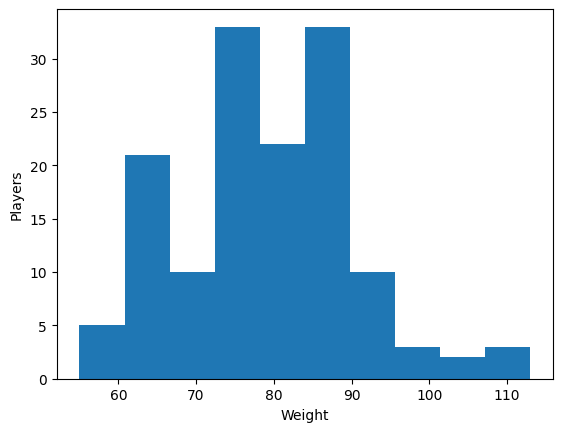

In [4]:
print("Mean weight is \n", wnba["Weight"].mean())
plt.hist(wnba["Weight"], bins = 10)
plt.xlabel("Weight")
plt.ylabel("Players")
plt.show()

Mean height is 
 184.61267605633802


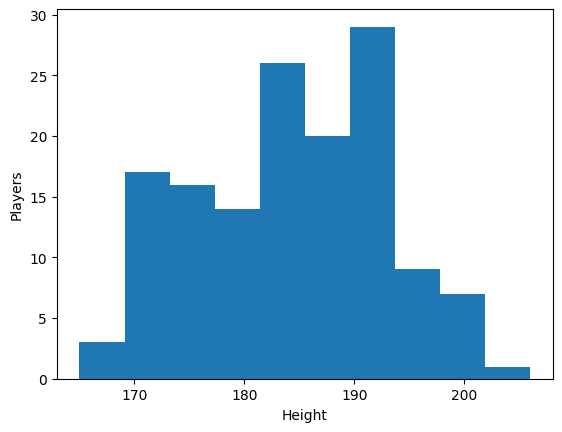

In [5]:
print("Mean height is \n", wnba["Height"].mean())
plt.hist(wnba["Height"], bins = 10)
plt.xlabel("Height")
plt.ylabel("Players")
plt.show()

Mean age is 
 27.112676056338028


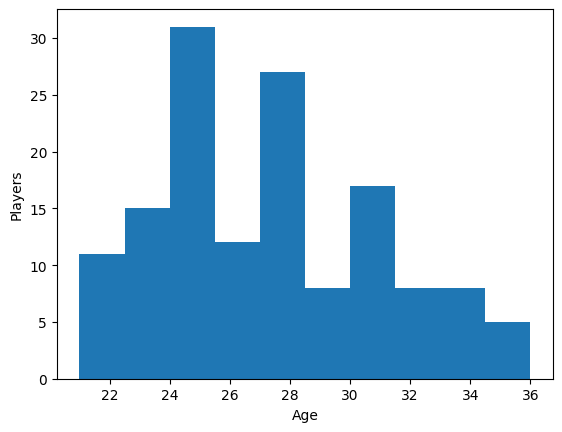

In [8]:
print("Mean age is \n", wnba["Age"].mean())
plt.hist(wnba["Age"], bins = 10)
plt.xlabel("Age")
plt.ylabel("Players")
plt.show()

Mean BMI is 
 23.09121422774648


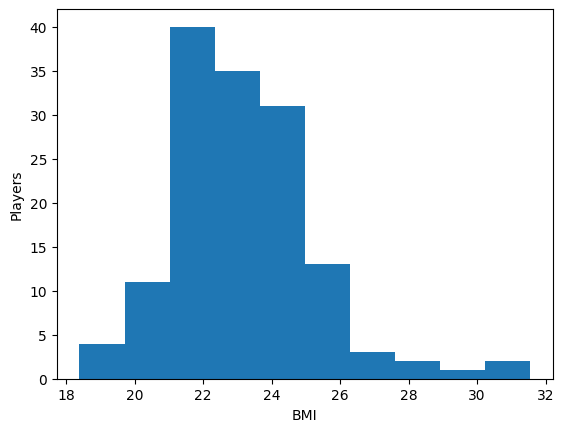

In [7]:
print("Mean BMI is \n", wnba["BMI"].mean())
plt.hist(wnba["BMI"], bins = 10)
plt.xlabel("BMI")
plt.ylabel("Players")
plt.show()

**What conclusions do you think we can take from this plots?**

In [ ]:
# I think BMI is the most truethfull to the definition of normal distribution - in my opinion - and can even see that for the number of
# values around the mean

# Age of course, skewed to the right, due to the fact that a lot of players will play most of time at "younger ages"

In addition to what the describe() method already told us we can see that the physical characteristics of the players (apart from the age) more or less follow a standard distribution, which is expected when looking at the distribution of values that arise from a lot of factors that are independent from each other as is the case for many physical quantities.

The height distribution looks like a bimodal. This may be due to the fact that players in basketball fall under two main categories (please note that this is a very gross generalization): shorter and more agile, and taller and less agile. Therefore there are less "average" height players since they will neither be as agile as the shorter players nor have the same impact in the paint (that is, under the basket) as a taller player.

The age distribution is a bit skewed to the right which is expected since most professional players stop playing after their prime physical years come to an end.

We could do the same for the main game stats. They are points, assists, blocks, rebounds and steals.

**Now plot the distribution of the columns `REB`, `AST`, `STL`, `PTS` and `BLK` the same way you did in the last cell.**

In [9]:
wnba.head(1)

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0


In [ ]:
print("Mean Rebound is \n", wnba["REB"].mean())
plt.hist(wnba["REB"], bins = 10)
plt.xlabel("Rebounds")
plt.ylabel("Frequency")
plt.show()

In [ ]:
print("MeanAssists is \n", wnba["AST"].mean())
plt.hist(wnba["AST"], bins = 10)
plt.xlabel("Assists")
plt.ylabel("Frequency")
plt.show()

In [ ]:
print("Mean Steals is \n", wnba["STL"].mean())
plt.hist(wnba["STL"], bins = 20)
plt.xlabel("Steals")
plt.ylabel("Frequency")
plt.show()

Mean Points is 
 203.16901408450704


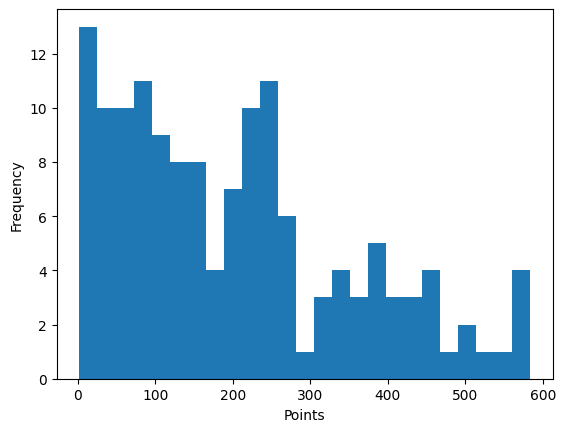

In [15]:
print("Mean Points is \n", wnba["PTS"].mean())
plt.hist(wnba["PTS"], bins = 25)
plt.xlabel("Points")
plt.ylabel("Frequency")
plt.show()

Mean Blocks is 
 9.78169014084507


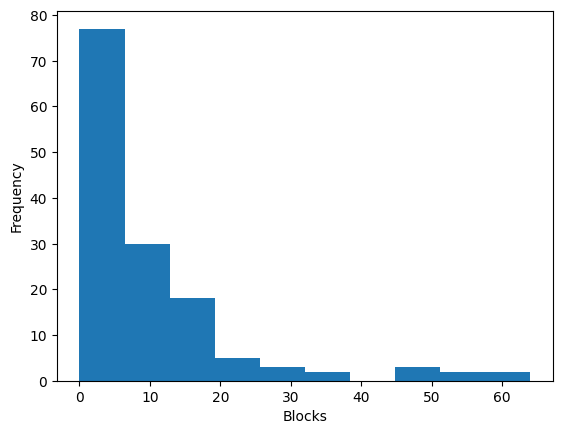

In [14]:
print("Mean Blocks is \n", wnba["BLK"].mean())
plt.hist(wnba["BLK"], bins = 10)
plt.xlabel("Blocks")
plt.ylabel("Frequency")
plt.show()

**What conclusions do you think we can take from this plots?**

In [ ]:
# They all assume an exponencial distributions, long tail to the right (skewed to the right)
# Maybe if all players played a full game, this would fall on a normal distribution.
# Or am I wrong?

As expected all of the above distribution are heavily skewed to the right, since most players will have very low to average stats while there will be a handful of star players whose stats peak above everyone else. It is also important to think about the fact that we are simply taking the stats as they are without considering the minutes played by each player. Even though skill plays a very important factor in determining this kind of stats we also have to consider that players that play more minutes will, on average, score more points (or blocks, assists, etc.).

**For the sake of it let's look at the same distributions by dividing those stats by the minutes played for each player in the dataset.**

In [16]:
wnba.head(2)

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0


Mean Rebound is 
 0.16902863707427523


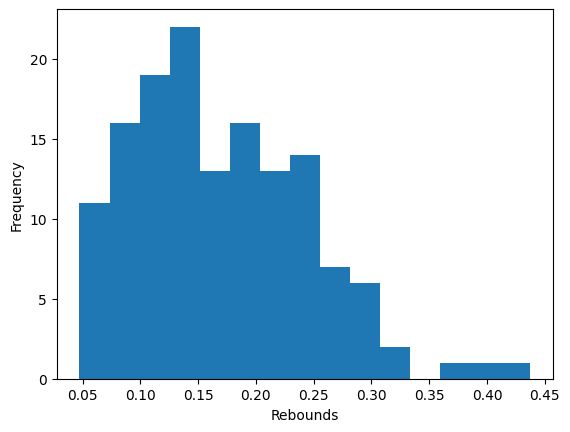

In [24]:
print("Mean Rebound is \n", (wnba["REB"]/wnba["MIN"]).mean())
plt.hist(wnba["REB"]/wnba["MIN"], bins = 15)
plt.xlabel("Rebounds")
plt.ylabel("Frequency")
plt.show()

Mean Assists is 
 0.07915086084279187


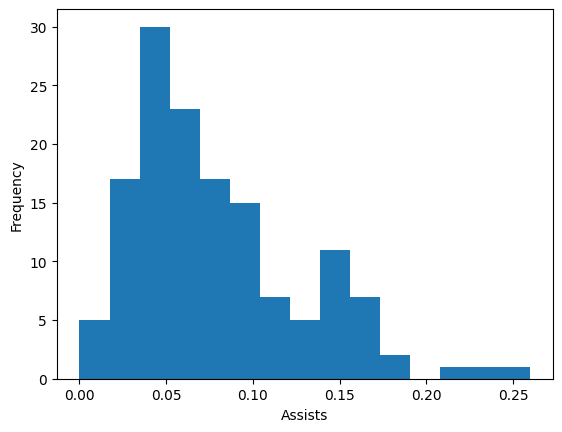

In [25]:
print("Mean Assists is \n", (wnba["AST"]/wnba["MIN"]).mean())
plt.hist(wnba["AST"]/wnba["MIN"], bins = 15)
plt.xlabel("Assists")
plt.ylabel("Frequency")
plt.show()

Mean Steals is 
 0.03438895685748749


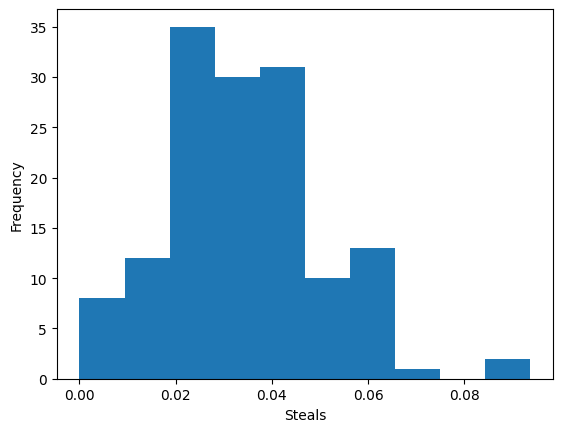

In [20]:
print("Mean Steals is \n", (wnba["STL"]/wnba["MIN"]).mean())
plt.hist(wnba["STL"]/wnba["MIN"], bins = 10)
plt.xlabel("Steals")
plt.ylabel("Frequency")
plt.show()

Mean Points is 
 0.3742523329115144


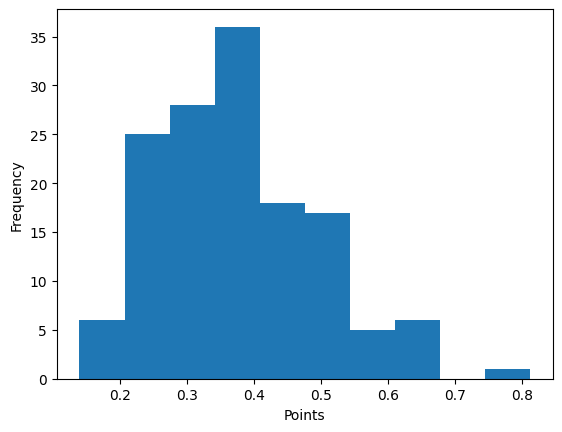

In [21]:
print("Mean Points is \n", (wnba["PTS"]/wnba["MIN"]).mean())
plt.hist(wnba["PTS"]/wnba["MIN"], bins = 10)
plt.xlabel("Points")
plt.ylabel("Frequency")
plt.show()

Mean Blocks is 
 0.020352463793082275


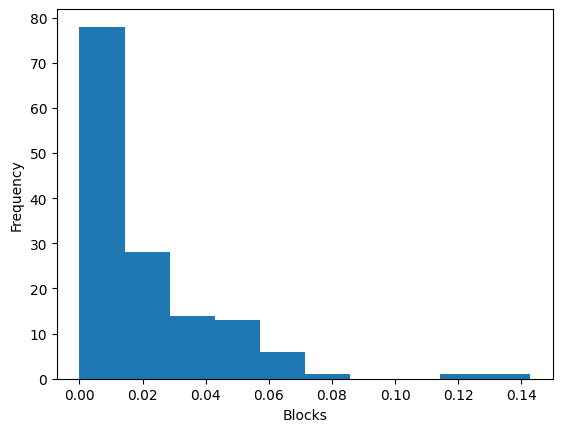

In [22]:
print("Mean Blocks is \n", (wnba["BLK"]/wnba["MIN"]).mean())
plt.hist(wnba["BLK"]/wnba["MIN"], bins = 10)
plt.xlabel("Blocks")
plt.ylabel("Frequency")
plt.show()

**What conclusions do you think we can take from this plots?**

In [26]:
# Well, now that there all in the same time frame, we actually see shapes more as a normal distribution, having the usual relationship
# with the mean (in the centre of the distribution). Just having doubts on the Blocks chart, still looking kinda of exponential,
# or just due to the fact that the mean is actually really close to zero (?!)

### Summary

The main insights we obtained from this exploratory analysis are:
- Game-related stats have a very high range of values.
- There are some extremes in the weight and age columns.
- The physical characteristics of the players more or less follow a standard distribution.
- We need to take into account that our dataset contains data on both players that play the majority of games and also players that may spend almost the entirety of the season on the bench.

Now, it's time to try to put an end to your family's discussions. As seen on the README, the main discussions are:
- Your grandmother says that your sister couldn't play in a professional basketball league (not only the WNBA, but ANY professional basketball league) because she's too skinny and lacks muscle.
- Your sister says that most female professional players fail their free throws.
- Your brother-in-law heard on the TV that the average assists among NBA (male) and WNBA (female) players is 52 for the 2016-2017 season. He is convinced this average would be higher if we only considered the players from the WNBA.

**Do you think you have all the necessary data to answer these questions?**

In [28]:
# Your grandmother says that your sister couldn't play in a professional basketball league (not only the WNBA, but ANY professional basketball league)
# because she's too skinny and lacks muscleyour comments here

# well, even from BMI we can´t tell how much muscle mass a person has: it's just a relation between weight and height and by the way, you could work on your body composition.
# Height actually could be more of an exclusion factor, if she was "as tall" as I am, 152 cm would cut the dream right away.

# but answering the question, we no not have the necessary data to confirm that granny is right or wrong!

In [39]:
# Your sister says that most female professional players fail their free throws.
FT_percentage = (wnba["FTM"] / wnba["FTA"]) * 100
print("The mean percentage of success in free throws is:",FT_percentage.mean())
# don't agree... almost 80% is a good rate

# 	Kobe Bryant*	SG	Los Angeles Lakers (1996–2016) ---> .837
#   Michael Jordan*	SG	Chicago Bulls (1984–1993, 1995–1998) --->	.835

The mean percentage of success in free throws is: 78.59271907346114


In [ ]:
# Your brother-in-law heard on the TV that the average assists among NBA (male) and WNBA (female) players is 52 for the 2016-2017 season.
# He is convinced this average would be higher if we only considered the players from the WNBA.

In [43]:
av_assists_wnba = wnba["AST"].mean()
av_assists_wnba

# brother in law is wrong. considering just WNBA, the average is lower than 52.

44.514084507042256